# **1. Perkenalan Dataset**


> Dataset yang digunakan adalah [Superstore Dataset](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final/data), dataset ini memiliki total 21 kolom dan memiliki kurang lebih 9.994 baris data.

# **2. Import Library**

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

In [111]:
# Download the dataset from kaggle and move into default colab directory
!kaggle datasets download -d vivek468/superstore-dataset-final

# Unzip the zip of dataset
!unzip /content/superstore-dataset-final.zip

# Rename the dataset to dataset.csv
!mv /content/'Sample - Superstore'.csv /content/dataset.csv
!rm /content/superstore-dataset-final.zip

Dataset URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final
License(s): other
  0% 0.00/550k [00:00<?, ?B/s]
100% 550k/550k [00:00<00:00, 106MB/s]
Archive:  /content/superstore-dataset-final.zip
  inflating: Sample - Superstore.csv  


In [112]:
# Read CSV with specified encoding
df = pd.read_csv('/content/dataset.csv', encoding='latin-1') # or 'ISO-8859-1', 'cp1252'

In [113]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


# **4. Exploratory Data Analysis (EDA)**

<!-- Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan. -->

In [114]:
# See Detail of Dataset
print("Struktur Dataset :")
print(f"Jumlah Baris: {df.shape[0]}, Jumlah Kolom: {df.shape[1]}")

print("\nTipe Data Kolom:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

Struktur Dataset :
Jumlah Baris: 9994, Jumlah Kolom: 21

Tipe Data Kolom:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount 

In [115]:
# Delete missing value if appear in dataset
df.dropna(inplace=True)

# prepare product data
product_data = df.groupby(['Product ID', 'Category', 'Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean'
}).reset_index()

# Preview product data
product_data.head(5)

,Product ID,Category,Sub-Category,Sales,Profit,Quantity,Discount
0,FUR-BO-10000112,Furniture,Bookcases,825.174,-117.8820,9,0.300000
1,FUR-BO-10000330,Furniture,Bookcases,1064.624,24.1960,10,0.100000
2,FUR-BO-10000362,Furniture,Bookcases,2154.348,311.1836,14,0.130000
3,FUR-BO-10000468,Furniture,Bookcases,723.842,-133.1092,21,0.183333
4,FUR-BO-10000711,Furniture,Bookcases,851.760,229.9752,12,0.000000


In [116]:
# Statistic preview
product_data.describe()

,Sales,Profit,Quantity,Discount
count,1862.000000,1862.000000,1862.000000,1862.000000
mean,1233.727637,153.811505,20.339957,0.150571
std,2807.155123,809.742393,11.296593,0.132955
min,1.624000,-8879.970400,1.000000,0.000000
25%,95.904000,10.120950,12.000000,0.066667
50%,295.452000,44.194050,19.000000,0.110556
75%,1158.591000,139.284300,27.000000,0.200000
max,61599.824000,25199.928000,75.000000,0.800000


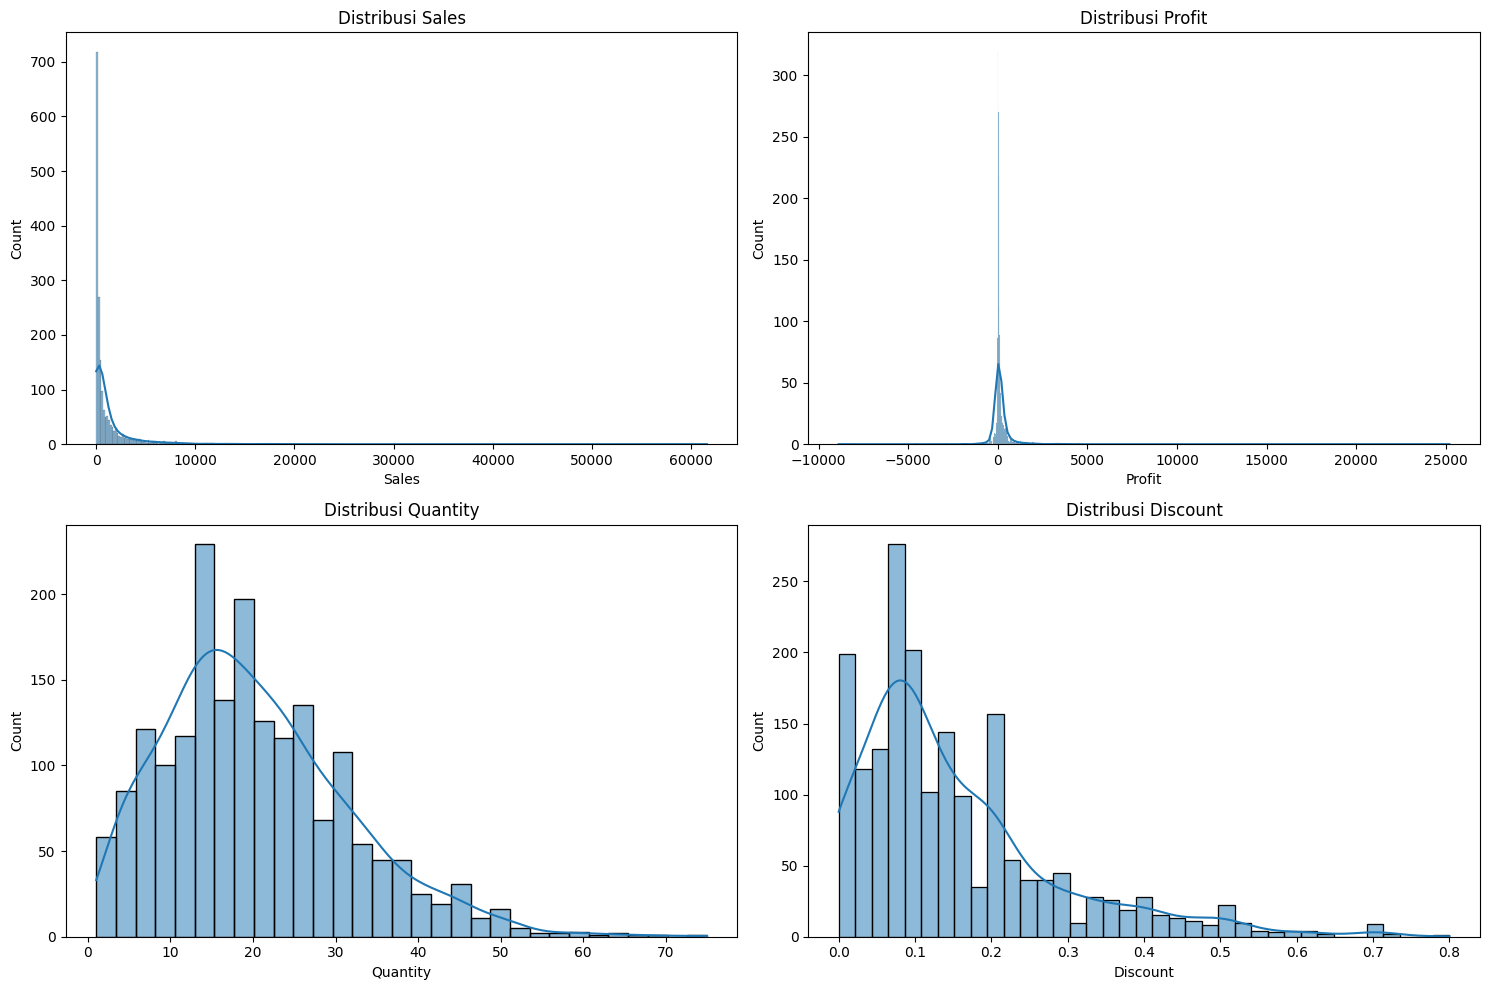

In [117]:
# Plotting variable numeric
plt.figure(figsize=(15,10))
numerical = ['Sales', 'Profit', 'Quantity', 'Discount']
for i, col in enumerate(numerical, 1):
    plt.subplot(2,2,i)
    sns.histplot(product_data[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

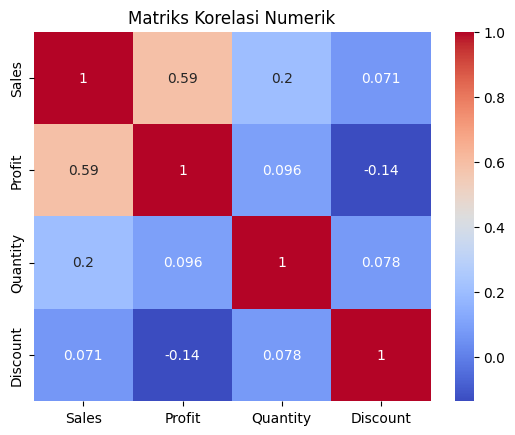

In [118]:
# matrix correlation
corr_matrix = product_data[numerical].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Numerik')
plt.show()



> Berdasarkan matriks korelasi ada beberapa informasi yang bisa diambil:

  - Sales dan Profit memiliki korelasi paling kuat (0.59), yang berarti semakin tinggi penjualan (Sales), umumnya semakin tinggi pula profit. Ini masuk akal karena peningkatan penjualan cenderung mendongkrak keuntungan.

  - Profit dan Discount memiliki korelasi negatif lemah (-0.14).  Artinya, pemberian diskon cenderung sedikit menekan profit, meskipun pengaruhnya tidak terlalu besar.

  - Sales dan Quantity serta Profit dan Quantity sama-sama memiliki korelasi positif yang relatif kecil (masing-masing 0.20 dan 0.096). Hal ini menunjukkan bahwa peningkatan jumlah barang terjual (Quantity) memang sejalan dengan Sales dan Profit, tetapi hubungannya tidak terlalu kuat.

  - Quantity dan Discount (0.078) serta Sales dan Discount (0.071) juga menunjukkan korelasi yang sangat lemah, sehingga diskon tidak memiliki hubungan yang kuat dengan jumlah barang terjual atau total penjualan dalam data ini.



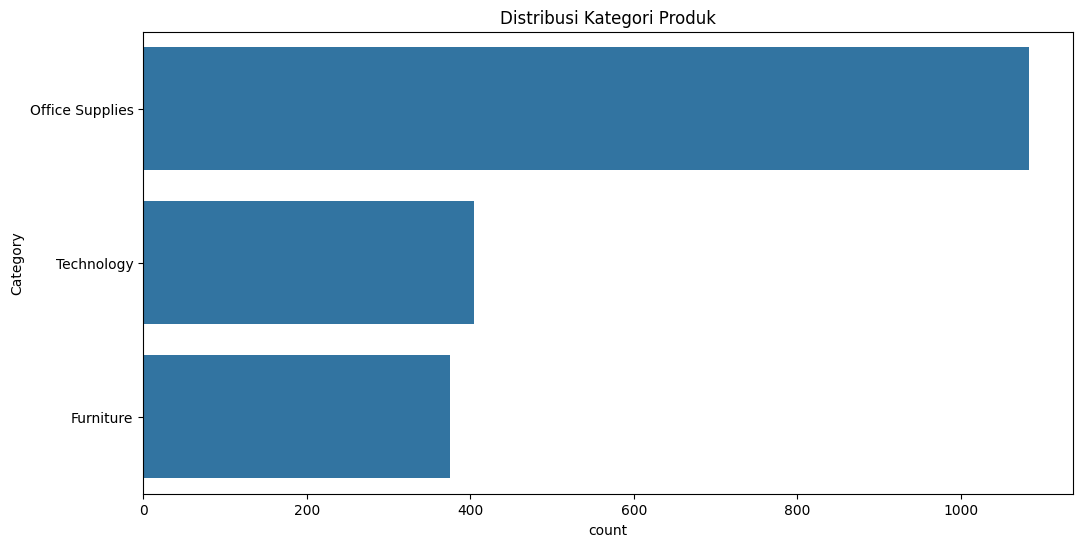

In [119]:
# product distribution
plt.figure(figsize=(12,6))
sns.countplot(data=product_data, y='Category', order=product_data['Category'].value_counts().index)
plt.title('Distribusi Kategori Produk')
plt.show()



> Distribusi kategori produk yang ada di dominasi oleh produk dengan kategori peralatan kantor, disusul teknologi, dan terakhir furnitur.



# **5. Data Preprocessing**

<!-- Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. -->

In [120]:
# Feature Selection
X = product_data[['Sales', 'Profit', 'Quantity', 'Discount', 'Category', 'Sub-Category']]

In [121]:
# Pipeline preprocessing (StandartScaling, Filling Missing Column, Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),  # If any missing values
            ('scaler', StandardScaler())
        ]), ['Sales', 'Profit', 'Quantity', 'Discount']),

        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')), # Filling missing value with most frequent data
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), ['Category', 'Sub-Category'])
    ])

X_processed = preprocessor.fit_transform(X)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [122]:
# Finding Optimal Cluster for Building Model
wcss = []
silhouette_scores = []

for k in range(2, 11):  # Start from cluster 2
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_processed)

    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_processed, labels))

## **b. Evaluasi Model Clustering**

<!-- Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster. -->

In [123]:
# Comparation of WCSS & Silhouette score for each n_clusters
df_compare = pd.DataFrame({'Jumlah Cluster': range(2, 11), 'WCSS': wcss, 'Silhouette Score': silhouette_scores})
df_compare

,Jumlah Cluster,WCSS,Silhouette Score
0,2,8711.675649,0.289118
1,3,7503.487494,0.289451
2,4,6674.419839,0.178236
3,5,5505.424196,0.174023
4,6,5031.819604,0.254710
5,7,4495.622810,0.236593
6,8,4190.188075,0.235438
7,9,3956.870684,0.235826
8,10,3977.483959,0.210207


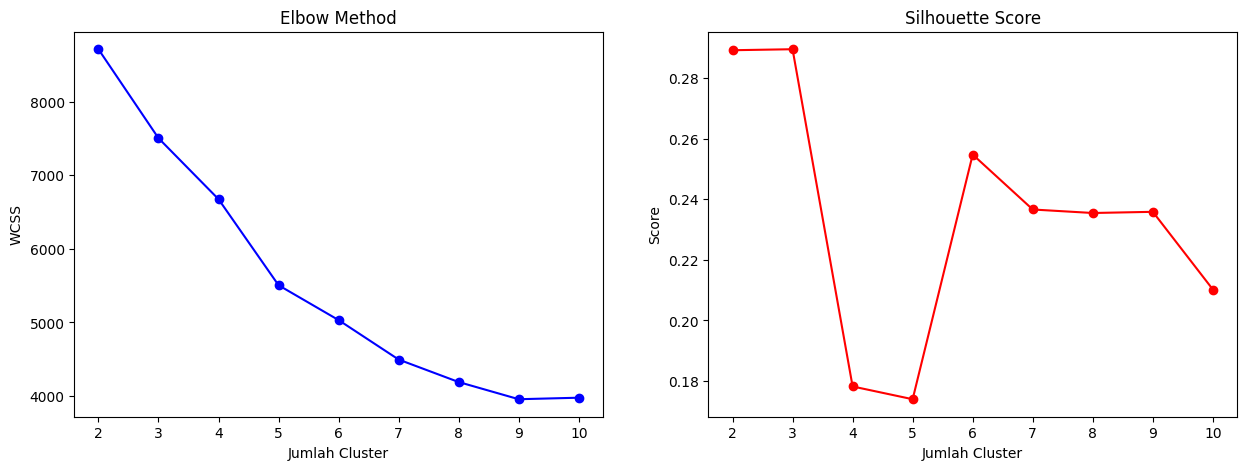

In [124]:
# Plot Elbow Method & Silhouette Score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(range(2,11), wcss, marker='o', color='blue')
ax1.set_title('Elbow Method')
ax1.set_xlabel('Jumlah Cluster')
ax1.set_ylabel('WCSS')

ax2.plot(range(2,11), silhouette_scores, marker='o', color='red')
ax2.set_title('Silhouette Score')
ax2.set_xlabel('Jumlah Cluster')
ax2.set_ylabel('Score')
plt.show()

In [125]:
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_processed)
product_data['Cluster'] = clusters

In [126]:
product_data['Cluster'].head()

,Cluster
0,0
1,2
2,2
3,2
4,2


> Berdasarkan nilai wcss dan silhouette_score, nilai k untuk model clustering yang paling baik adalah k=3. ini karena nilai wcss menurun ketika k meningkat, dan silhouette score yang menurun setelah k=3.

In [127]:
# Evaluasi Final dengan Silhouette Score
final_score = silhouette_score(X_processed, clusters)
print(f"\nSilhouette Score untuk k={best_k}: {final_score:.3f}")


Silhouette Score untuk k=3: 0.289


## **c. Visualisasi Hasil Clustering**



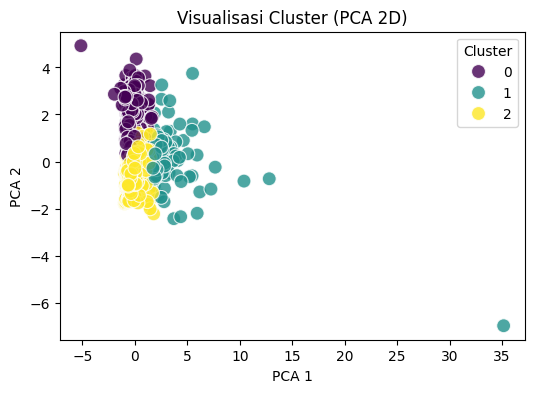

In [128]:
# PCA 2D Projection
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed)

plt.figure(figsize=(6,4))
sns.scatterplot(
    x=pca_result[:,0],
    y=pca_result[:,1],
    hue=product_data['Cluster'],
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('Visualisasi Cluster (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## **d. Analisis dan Interpretasi Hasil Cluster**

In [129]:
# Profil Cluster
cluster_profile = product_data.groupby('Cluster').agg({
    'Sales': 'mean',
    'Profit': 'mean',
    'Quantity': 'mean',
    'Discount': 'mean',
    'Category': lambda x: x.mode()[0], # Most Product Category in Cluster
    'Sub-Category': lambda x: x.mode()[0] # Most Product Sub Category in Cluster
}).reset_index()

print("\nProfil Cluster:")
print(cluster_profile.round(2))


Profil Cluster:
   Cluster    Sales   Profit  Quantity  Discount         Category Sub-Category
0        0  1128.67  -121.37     23.47      0.38  Office Supplies      Binders
1        1  9327.44  1560.32     30.45      0.15       Technology       Chairs
2        2   680.03   117.32     18.89      0.10  Office Supplies        Paper


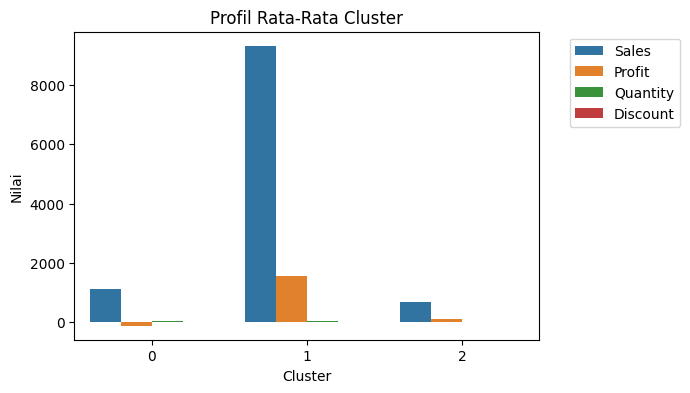

In [130]:
# Visualisasi Profil Cluster
melted = cluster_profile.melt(id_vars='Cluster', value_vars=['Sales', 'Profit', 'Quantity', 'Discount'])
plt.figure(figsize=(6,4))
sns.barplot(data=melted, x='Cluster', y='value', hue='variable')
plt.title('Profil Rata-Rata Cluster')
plt.ylabel('Nilai')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

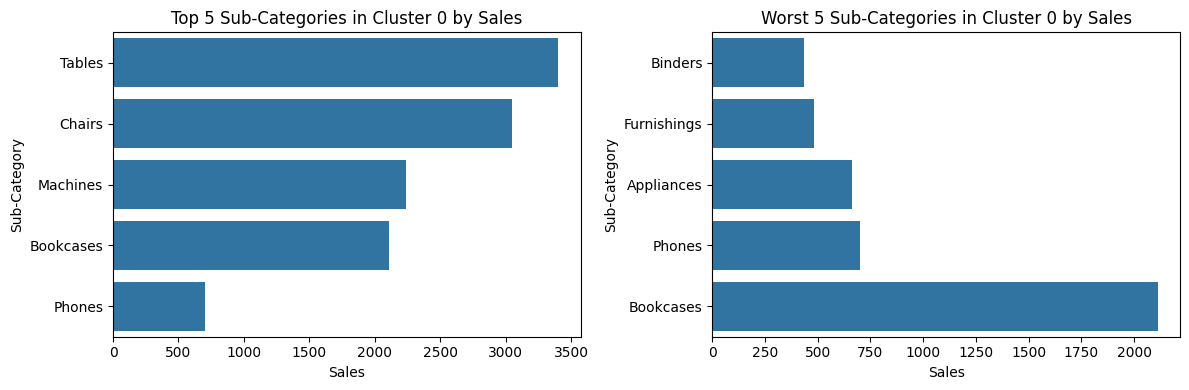

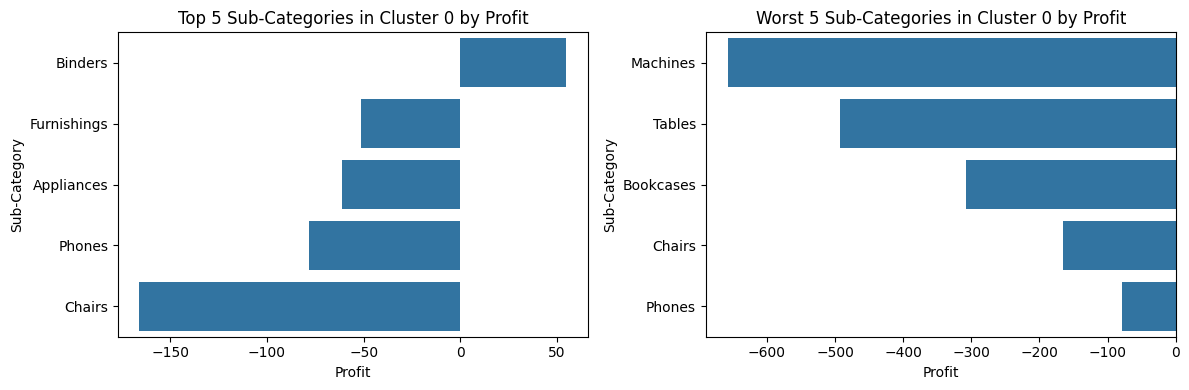

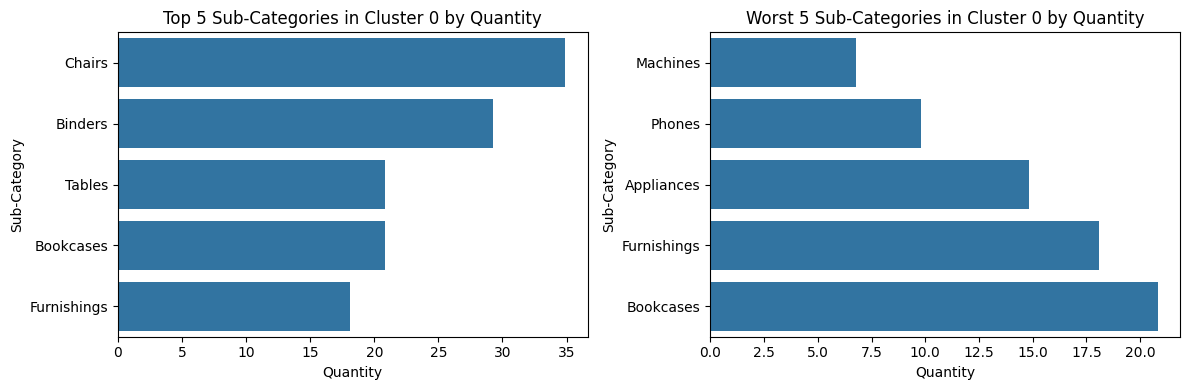

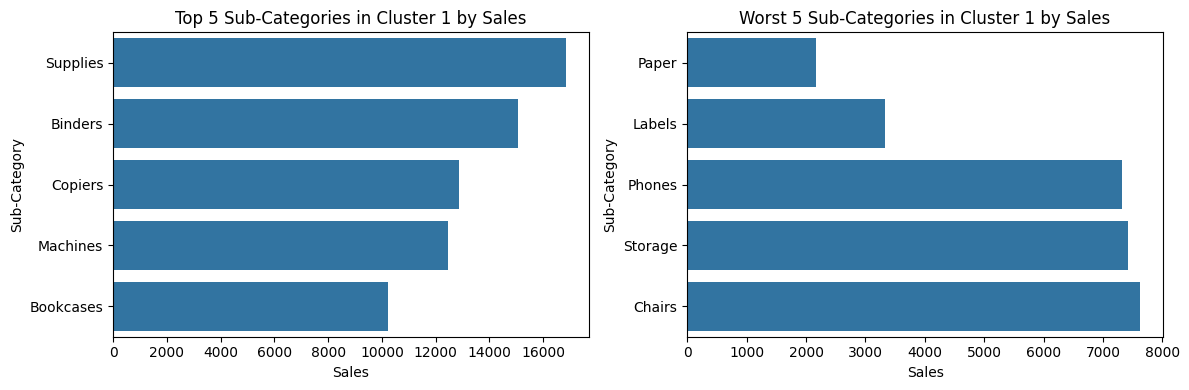

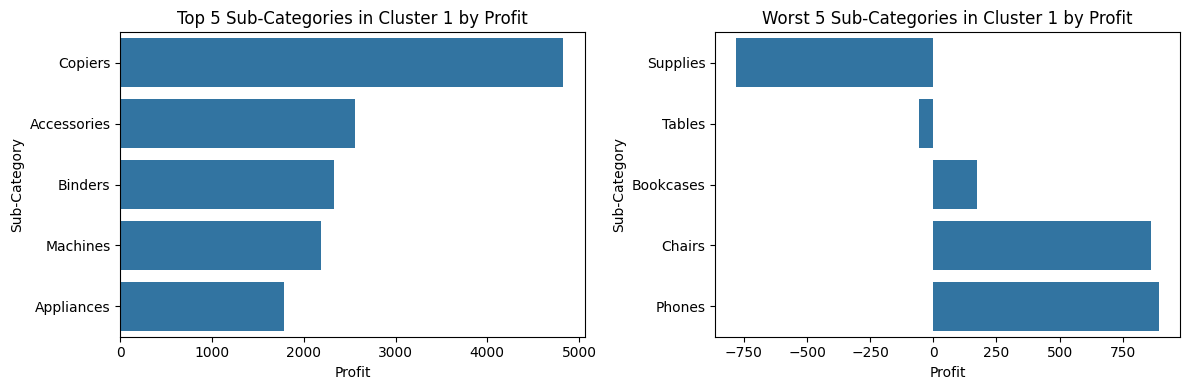

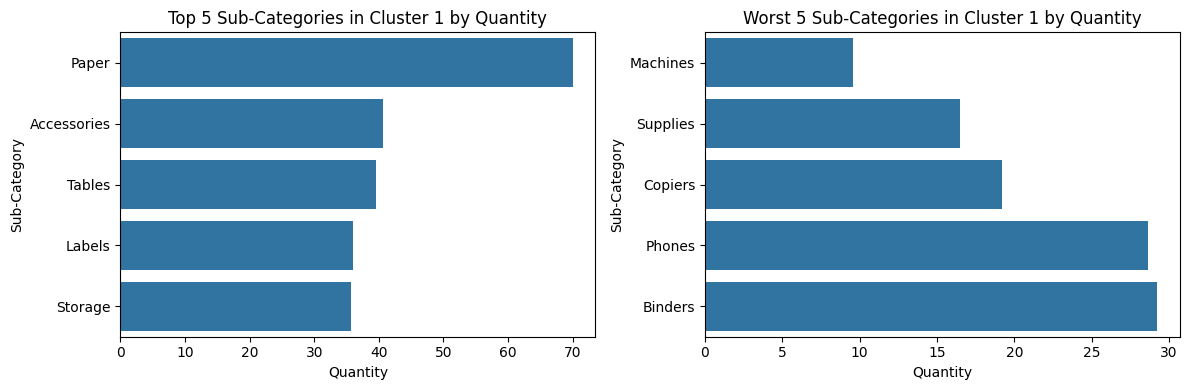

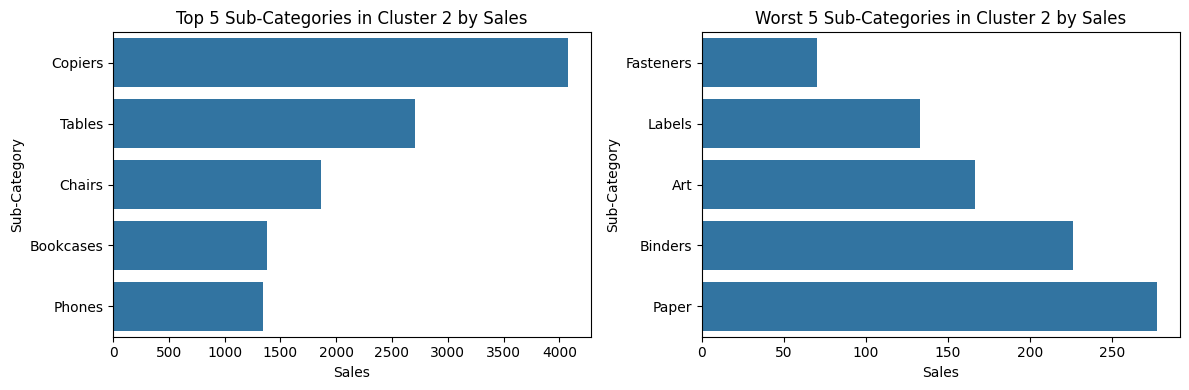

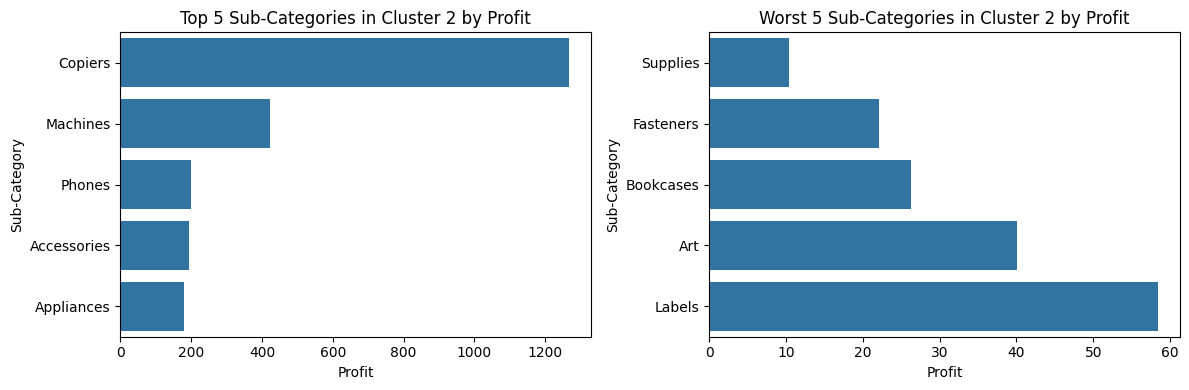

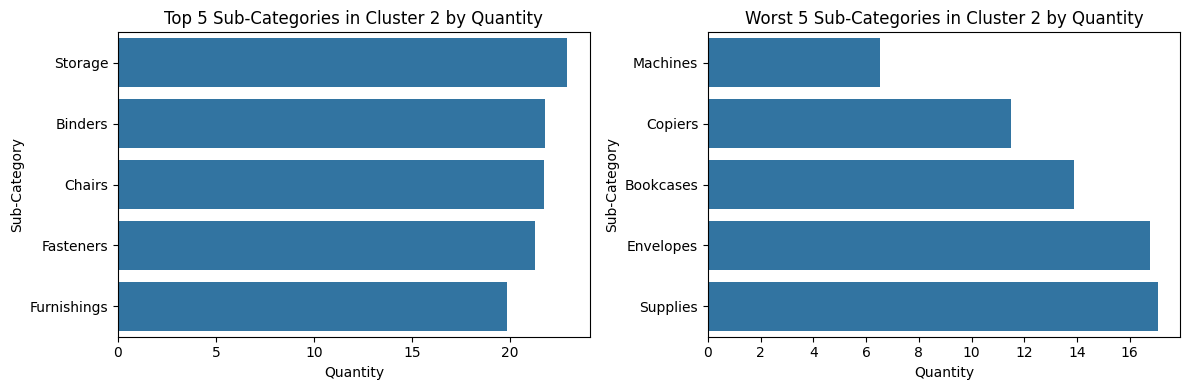

In [131]:
# Visualizing Most & Worst product sub-category in each cluster by sales, profit, and quantity
def plot_top_subcategories(cluster_num, metric, ax):
    cluster_data = product_data[product_data['Cluster'] == cluster_num]
    top_subcategories = cluster_data.groupby('Sub-Category')[metric].mean().nlargest(5)  # Top 5 sub-categories
    sns.barplot(x=top_subcategories.values, y=top_subcategories.index, ax=ax)
    ax.set_title(f'Top 5 Sub-Categories in Cluster {cluster_num} by {metric}')
    ax.set_xlabel(metric)
    ax.set_ylabel('Sub-Category')

def plot_bottom_subcategories(cluster_num, metric, ax):
    cluster_data = product_data[product_data['Cluster'] == cluster_num]
    bottom_subcategories = cluster_data.groupby('Sub-Category')[metric].mean().nsmallest(5)  # Worst 5 sub-categories
    sns.barplot(x=bottom_subcategories.values, y=bottom_subcategories.index, ax=ax)
    ax.set_title(f'Worst 5 Sub-Categories in Cluster {cluster_num} by {metric}')
    ax.set_xlabel(metric)
    ax.set_ylabel('Sub-Category')

for cluster in range(best_k):
  for metric in ['Sales', 'Profit', 'Quantity']:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    plot_top_subcategories(cluster, metric, ax1)
    plot_bottom_subcategories(cluster, metric, ax2)

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Penjualan (k$):** 1,128.67

- **Rata-rata Profit (k$):** -121.37

- **Rata-rata Quantity terjual (item):** 23 item.

- **Rata-rata Discount (%):** 38%.

- **Analisis:** Cluster ini mencakup penjualan produk produk yang ada di toko dengan rata rata penjualan yang cukup tinggi, namun memiliki profit yang merugi. produk yang ada di dalam kluster ini harus dievaluasi kembali strategi pemasaran nya seperti penyesuaian harga produk dengan diskon yang sesuai sehingga perusahaan tidak merugi.

## Cluster 1:
- **Rata-rata Penjualan (k$):** 9,327.44

- **Rata-rata Profit (k$):** 1,560.32

- **Rata-rata Quantity terjual (item):** 30 item.

- **Rata-rata Discount (%):** 15%.

- **Analisis:** Cluster ini mencakup penjualan produk produk yang ada di toko dengan rata rata penjualan yang tinggi, serta memiliki profit yang tinggi juga. produk yang ada di dalam kluster ini bisa diartikan adalah produk yang memiliki minat pasar yang tinggi saat ini, sehingga perusahaan dapat mempertimbangkan untuk menambah kuantitas produk-produk yang ada di cluster ini.

## Cluster 2:
- **Rata-rata Penjualan (k$):** 680.03

- **Rata-rata Profit (k$):** 117.32

- **Rata-rata Quantity terjual (item):** 19 item.

- **Rata-rata Discount (%):** 10%.

- **Analisis:** Cluster ini mencakup penjualan produk produk yang ada di toko dengan rata rata penjualan yang rendah, namun memiliki profit yang positif. produk yang ada di dalam kluster ini bisa kita tingkatkan lagi dari sisi penjualan dan profitnya dengan cara menyesuaikan diskon yang diberikan dan memberikan promo promo yang menarik.

# **7. Mengekspor Data**

Simpan hasilnya ke dalam file CSV.

In [132]:
# export the dataset to csv
product_data.to_csv('dataset_clustering.csv', index=False)